# Исследовательская часть

## Пункт 0. Генерация обучающей выборки для дальнейших тестов

In [7]:
import numpy as np
import scipy as sc
import sklearn.utils as skutils
import svm
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

In [8]:
X_fst = 7*np.random.randn(300, 100)
signs = 2*(np.random.randint(0, 2, 100)-0.5)
X_sec = 7*np.random.randn(300, 100)+((np.random.randn(100)+10)*signs)
X_train = np.vstack((X_fst, X_sec))
y_train = np.hstack((np.ones(300), np.zeros(300)-1))
X_train, y_train = skutils.shuffle(X_train, y_train)

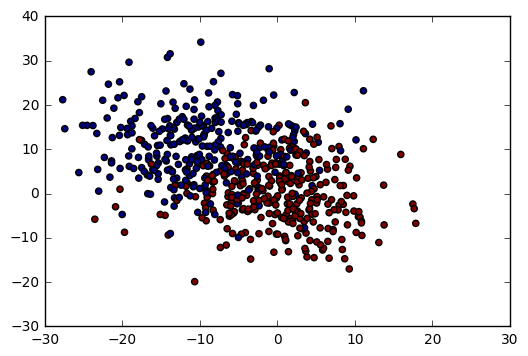

In [9]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=1.0)
plt.show()

## Пункт 1. Исследование зависимости времени работы метода от размерности данных на линейном ядре

In [5]:
time_data = []
time_data2 = []
my_svm = svm.SVM(C=0.2, method='liblinear')
for i in range(30, 301, 30):
    time_res = %timeit -o my_svm.fit(np.vstack((X_fst[:i], X_sec[:i])), np.hstack((np.ones(i), np.zeros(i)-1)), verbose=False)
    time_data.append(time_res.best)
for i in range(10, 101, 10):
    time_res = %timeit -o my_svm.fit(X_train[:, :i], y_train, verbose=False)
    time_data2.append(time_res.best)

clear_output()

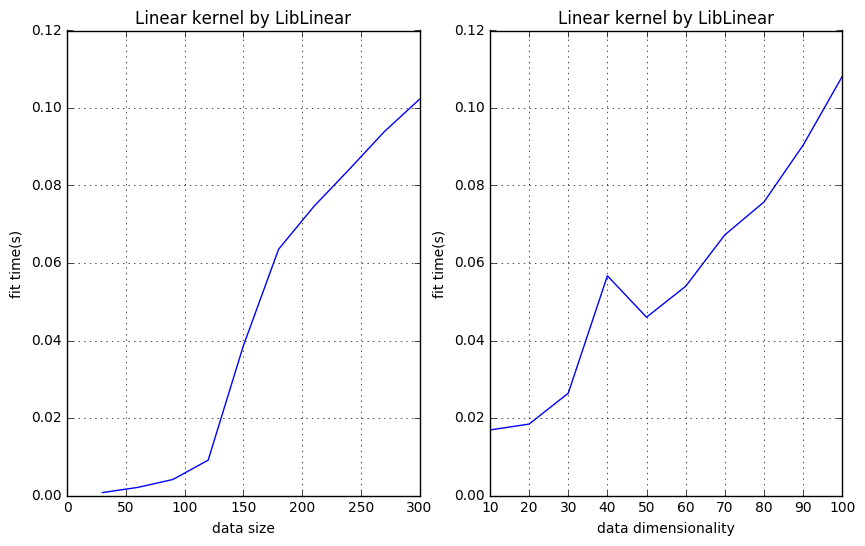

In [6]:
def show_time_plots(time_data, time_data2, labels):
    plt.figure(figsize=(10, 6))
    s_axis = np.arange(30, 301, 30)
    plt.subplot(1, 2, 1)
    plt.plot(s_axis, time_data)

    plt.xlabel('data size')
    plt.ylabel('fit time(s)')
    plt.title(labels)
    plt.grid(True)

    s_axis = np.arange(10, 101, 10)
    plt.subplot(1, 2, 2)
    plt.plot(s_axis, time_data2)

    plt.xlabel('data dimensionality')
    plt.ylabel('fit time(s)')
    plt.title(labels)
    plt.grid(True)
    plt.show()
    
show_time_plots(time_data, time_data2, '''Linear kernel by LibLinear''')

In [7]:
time_data = []
time_data2 = []
my_svm = svm.SVM(C=0.5, method='subgradient')
for i in range(30, 301, 30):
    time_res = %timeit -o my_svm.fit(np.vstack((X_fst[:i], X_sec[:i])), \
                                     np.hstack((np.ones(i), np.zeros(i)-1)), \
                                     tol=1e-3, max_iter = 1000, verbose=False, \
                                     stop_criterion="argument", alpha=0.5, beta=1.0)
    time_data.append(time_res.best)
for i in range(10, 101, 10):
    time_res = %timeit -o my_svm.fit(X_train[:, :i], y_train, \
                                     tol=1e-3, max_iter = 1000, verbose=False, \
                                     stop_criterion="argument", alpha=0.5, beta=1.0)
    time_data2.append(time_res.best)
clear_output()

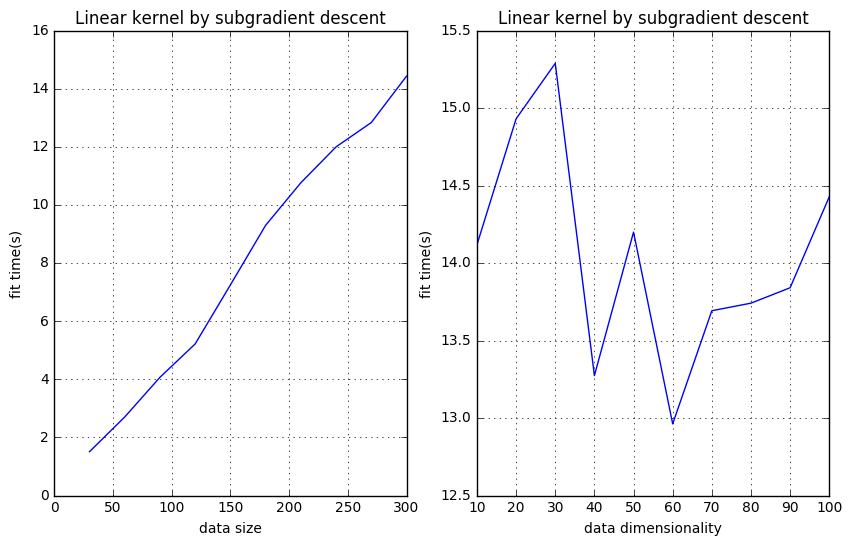

In [8]:
show_time_plots(time_data, time_data2, '''Linear kernel by subgradient descent''')

In [36]:
time_data = []
time_data2 = []
my_svm = svm.SVM(C=0.5, method='stoch_subgradient')
for i in range(30, 301, 10):
    time_res = %timeit -o my_svm.fit(np.vstack((X_fst[:i], X_sec[:i])), \
                                     np.hstack((np.ones(i), np.zeros(i)-1)), \
                                     tol=1e-3, max_iter = 1000, verbose=False, \
                                     stop_criterion="argument", alpha=0.001, beta=0.001)
    time_data.append(time_res.best)
for i in range(10, 101, 5):
    time_res = %timeit -o my_svm.fit(X_train[:, :i], y_train, \
                                     tol=1e-3, max_iter = 1000, verbose=False, \
                                     stop_criterion="argument", alpha=0.001, beta=0.001)
    time_data2.append(time_res.best)
clear_output()

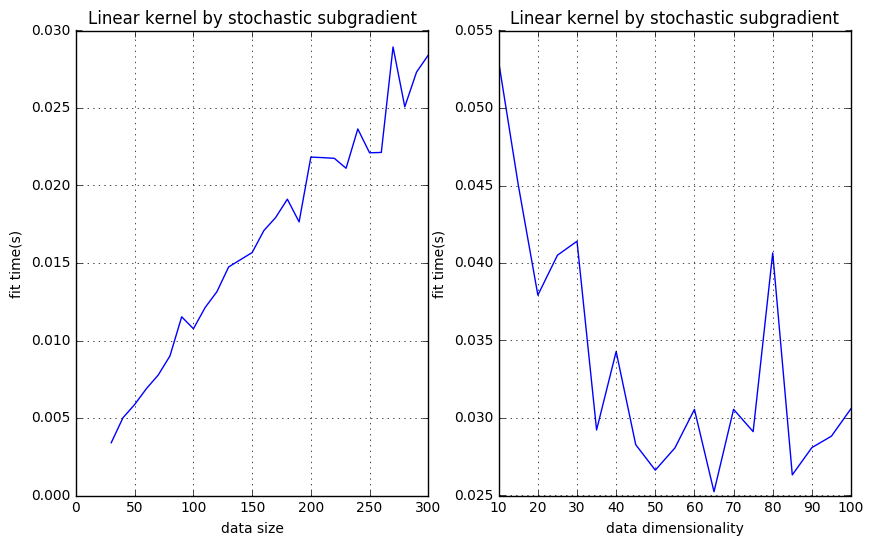

In [37]:
def show_time_plots(time_data, time_data2, labels, step1=30, step2=10):
    plt.figure(figsize=(10, 6))
    s_axis = np.arange(30, 301, step1)
    plt.subplot(1, 2, 1)
    plt.plot(s_axis, time_data)

    plt.xlabel('data size')
    plt.ylabel('fit time(s)')
    plt.title(labels)
    plt.grid(True)

    s_axis = np.arange(10, 101, step2)
    plt.subplot(1, 2, 2)
    plt.plot(s_axis, time_data2)

    plt.xlabel('data dimensionality')
    plt.ylabel('fit time(s)')
    plt.title(labels)
    plt.grid(True)
    plt.show()
show_time_plots(time_data, time_data2, '''Linear kernel by stochastic subgradient''', 10, 5)

In [11]:
time_data = []
time_data2 = []
my_svm = svm.SVM(C=0.5, method='primal')
for i in range(30, 301, 10):
    time_res = %timeit -o my_svm.fit(np.vstack((X_fst[:i], X_sec[:i])), \
                                     np.hstack((np.ones(i), np.zeros(i)-1)), verbose=False)
    time_data.append(time_res.best)
for i in range(10, 101, 5):
    time_res = %timeit -o my_svm.fit(X_train[:, :i], y_train, verbose=False)
    time_data2.append(time_res.best)
clear_output()

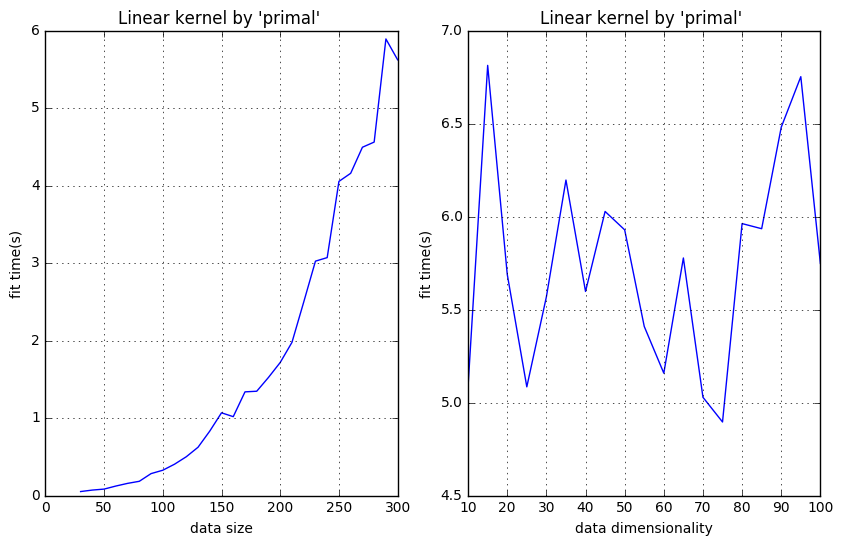

In [12]:
show_time_plots(time_data, time_data2, '''Linear kernel by 'primal' ''', 10, 5)

In [13]:
time_data = []
time_data2 = []
my_svm = svm.SVM(C=0.5, method='dual', kernel='linear')
for i in range(30, 301, 30):
    time_res = %timeit -o my_svm.fit(np.vstack((X_fst[:i], X_sec[:i])), \
                                     np.hstack((np.ones(i), np.zeros(i)-1)), verbose=False)
    time_data.append(time_res.best)
for i in range(10, 101, 10):
    time_res = %timeit -o my_svm.fit(X_train[:, :i], y_train, verbose=False)
    time_data2.append(time_res.best)
clear_output()

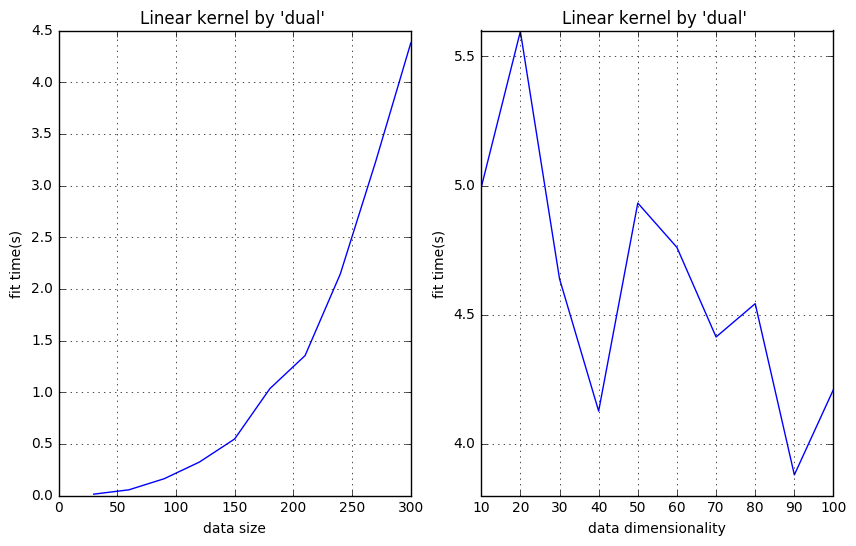

In [14]:
show_time_plots(time_data, time_data2, '''Linear kernel by 'dual' ''')

### Сравнение значений целевой функции для разных методов

In [21]:
my_svm = svm.SVM(C=1.0, method='liblinear')
my_svm.fit(X_train, y_train, verbose=False)
print("LibLinear:", my_svm.compute_primal_objective(X_train, y_train))

my_svm = svm.SVM(C=1.0, method='primal')
my_svm.fit(X_train, y_train, verbose=False)
print("Primal:", my_svm.compute_primal_objective(X_train, y_train))

my_svm = svm.SVM(C=1.0, method='subgradient')
my_svm.fit(X_train, y_train, tol=1e-5, max_iter = 1000, verbose=False, \
           stop_criterion="objective", alpha=0.3, beta=1.0)
print("Subgradient:", my_svm.compute_primal_objective(X_train, y_train))

my_svm = svm.SVM(C=0.5, method='stoch_subgradient')
my_svm.fit(X_train, y_train, tol=1e-5, max_iter = 10000, verbose=False, \
           stop_criterion="objective", alpha=0.5, beta=1.0)
print("Stochastic subgradient:", my_svm.compute_primal_objective(X_train, y_train))

my_svm = svm.SVM(C=0.5, method='dual', kernel='linear')
my_svm.fit(X_train, y_train, verbose=False)
print("Dual linear:", my_svm.compute_dual_objective(X_train, y_train))

LibLinear: [ 1.75562456]
Primal: 0.841667944618
Subgradient: [ 642591.70264089]
Stochastic subgradient: [ 17.2000971]
Dual linear: 0.00125797236425


## Пункт 2. Исследование зависимости времени работы метода от размерности данных на ядре RBF

In [54]:
time_data = []
time_data2 = []
my_svm = svm.SVM(C=0.5, method='libsvm', gamma=1.0)
for i in range(30, 301, 30):
    time_res = %timeit -o my_svm.fit(np.vstack((X_fst[:i], X_sec[:i])), \
                                     np.hstack((np.ones(i), np.zeros(i)-1)), verbose=False)
    time_data.append(time_res.best)
for i in range(10, 101, 10):
    time_res = %timeit -o my_svm.fit(X_train[:, :i], y_train, verbose=False)
    time_data2.append(time_res.best)
clear_output()

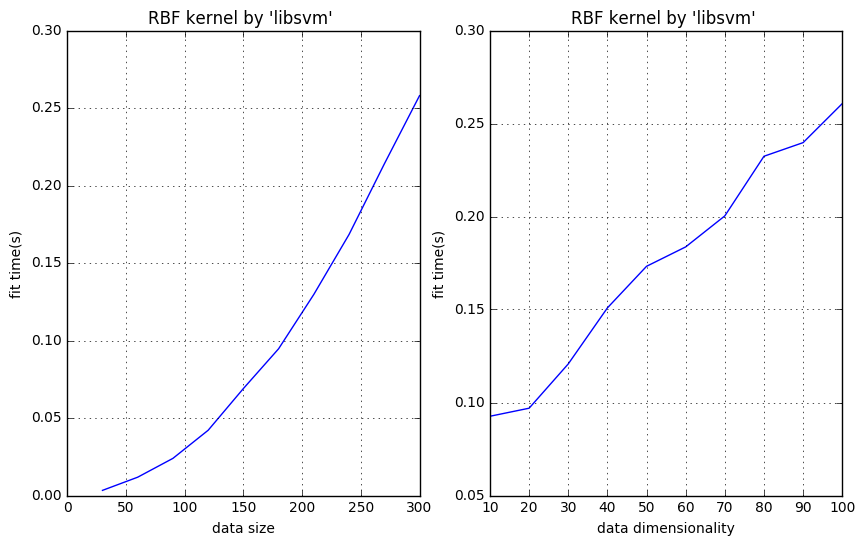

In [55]:
show_time_plots(time_data, time_data2, '''RBF kernel by 'libsvm' ''')

In [56]:
time_data = []
time_data2 = []
my_svm = svm.SVM(C=0.5, method='dual', kernel='rbf', gamma=1.0)
for i in range(30, 301, 30):
    time_res = %timeit -o my_svm.fit(np.vstack((X_fst[:i], X_sec[:i])), \
                                     np.hstack((np.ones(i), np.zeros(i)-1)), verbose=False)
    time_data.append(time_res.best)
for i in range(10, 101, 10):
    time_res = %timeit -o my_svm.fit(X_train[:, :i], y_train, verbose=False)
    time_data2.append(time_res.best)
clear_output()

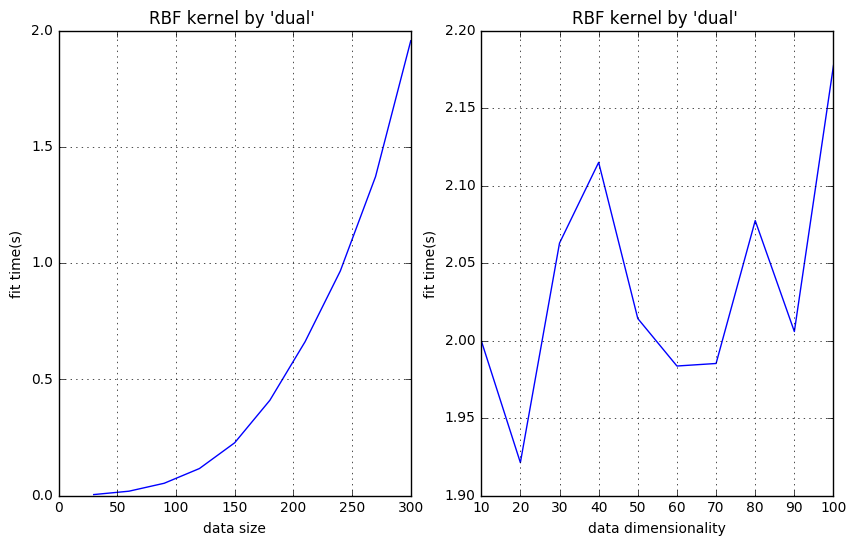

In [57]:
show_time_plots(time_data, time_data2, '''RBF kernel by 'dual' ''')

In [60]:
my_svm = svm.SVM(C=0.5, method='libsvm', gamma=1.0)
my_svm.fit(X_train, y_train, verbose=False)
print("Lib SVM:", my_svm.compute_dual_objective(X_train, y_train))

my_svm = svm.SVM(C=0.5, method='dual', kernel='rbf', gamma=1.0)
my_svm.fit(X_train, y_train, verbose=False)
print("Dual RBF:", my_svm.compute_dual_objective(X_train, y_train))

Lib SVM: 0.0
Dual RBF: 299.99996162


## Пункт 3. Поиск оптимального значения **C** и **gamma**

In [11]:
from sklearn.model_selection import KFold
kfold_obj = KFold(n_splits=5, shuffle=True)

C_pg = []
for i in range(-2, 3):
    C_pg.extend([10**i, 2*10**i, 5*10**i])
gamma_pg = C_pg

In [12]:
def get_accuracy(pred, real):
    real = list(real)
    pred = list(pred)
    my_sum = 0.0
    for idx in range(len(pred)):
        my_sum += float(pred[idx] == real[idx])
    return my_sum/len(real)

In [96]:
errors = []
for curr_C in C_pg:
    for curr_gamma in gamma_pg:
        my_svm = svm.SVM(C=curr_C, method='dual', kernel='rbf', gamma=curr_gamma)
        error = []
        for train_inds, test_inds in kfold_obj.split(X_train):
            my_svm.fit(X_train[train_inds, :5], y_train[train_inds], verbose=False)
            y_pred = my_svm.predict(X_train[test_inds, :5], return_classes=True)
            error.append(get_accuracy(y_pred, y_train[test_inds]))
        errors.append({'C': curr_C,
                       'gamma': curr_gamma,
                       'score': min(error)})
        print(errors[-1])
clear_output()

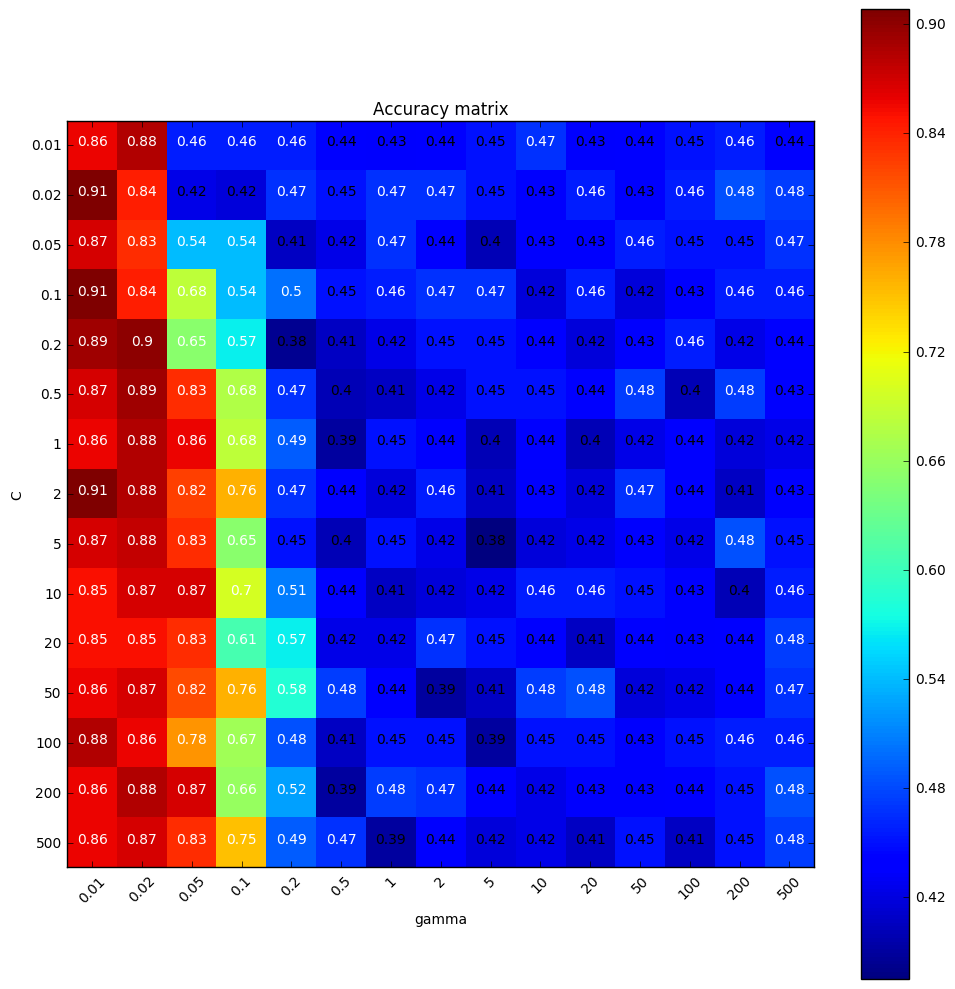

In [115]:
import itertools

def plot_matrix(mat, C_pg, gamma_pg, title='Accuracy matrix',
                          cmap=plt.cm.jet):
    plt.imshow(mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(C_pg))
    plt.xticks(tick_marks, gamma_pg, rotation=45)
    plt.yticks(tick_marks, C_pg)

    thresh = mat.max() / 2.
    for i, j in itertools.product(range(mat.shape[0]), range(mat.shape[1])):
        plt.text(j, i, np.around(mat[i, j], decimals=2),
                 horizontalalignment="center",
                 color="white" if mat[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('C')
    plt.xlabel('gamma')

mat = np.zeros((len(C_pg), len(gamma_pg)))
k = 0
for i in range(len(C_pg)):
    for j in range(len(gamma_pg)):
        mat[i, j] = errors[k]['score']
        k += 1
plt.figure(figsize=(10, 10))
plot_matrix(mat, C_pg, gamma_pg)

In [8]:
sepX_fst = np.random.randn(300, 5)
sepX_sec = 5*np.random.randn(300, 5)+20
sepX_train = np.vstack((sepX_fst, sepX_sec))
sepy_train = np.hstack((np.ones(300), np.zeros(300)-1))
sepX_train, sepy_train = skutils.shuffle(sepX_train, sepy_train)


In [13]:
C_pg = []
for i in range(-2, 3):
    C_pg.extend([10**i, 2*10**i, 5*10**i])

gamma_pg = C_pg

In [14]:
sep_errors = []
for curr_C in C_pg:
    for curr_gamma in gamma_pg:
        my_svm = svm.SVM(C=curr_C, method='dual', kernel='rbf', gamma=curr_gamma)
        error = []
        for train_inds, test_inds in kfold_obj.split(X_train):
            my_svm.fit(sepX_train[train_inds], sepy_train[train_inds], verbose=False)
            y_pred = my_svm.predict(sepX_train[test_inds, :5], return_classes=True)
            error.append(get_accuracy(y_pred, sepy_train[test_inds]))
        sep_errors.append({'C': curr_C,
                           'gamma': curr_gamma,
                           'score': min(error)})
        print(sep_errors[-1])
clear_output()

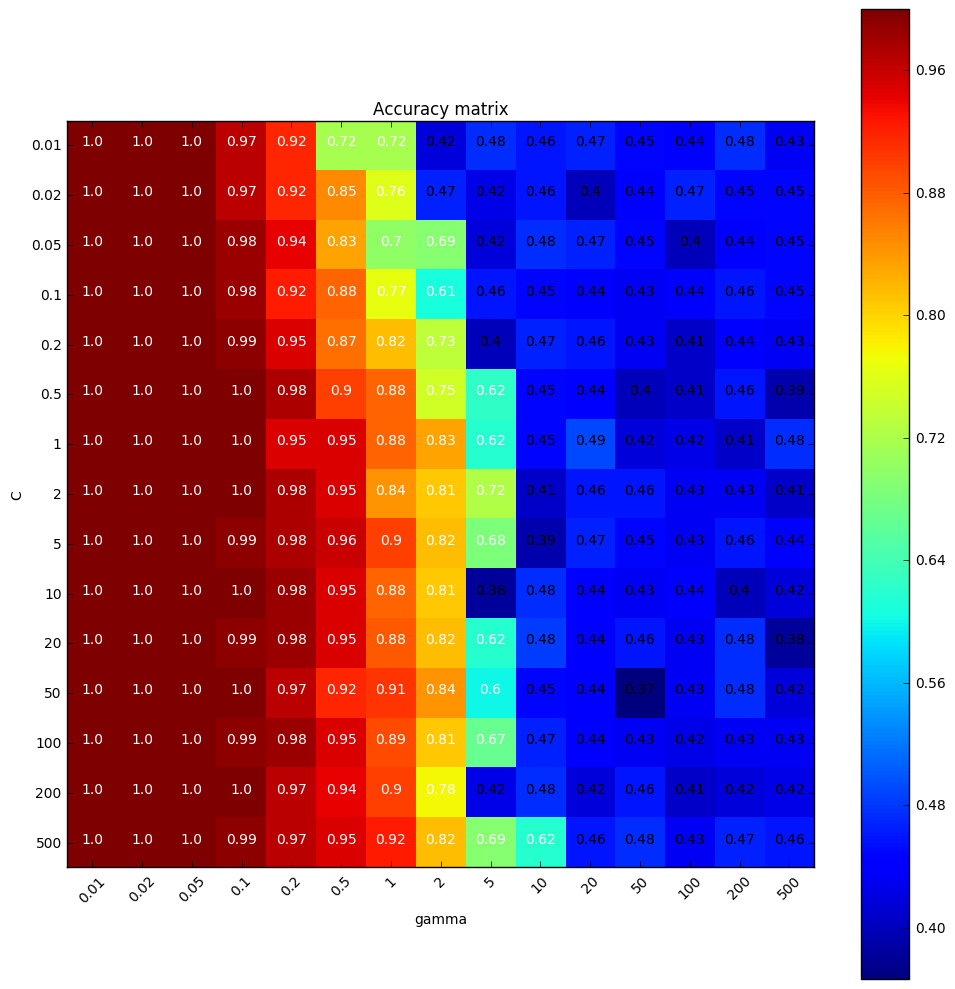

In [17]:
import itertools

def plot_matrix(mat, C_pg, gamma_pg, title='Accuracy matrix',
                          cmap=plt.cm.jet):
    plt.imshow(mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(C_pg))
    plt.xticks(tick_marks, gamma_pg, rotation=45)
    plt.yticks(tick_marks, C_pg)

    thresh = mat.max() / 2.
    for i, j in itertools.product(range(mat.shape[0]), range(mat.shape[1])):
        plt.text(j, i, np.around(mat[i, j], decimals=2),
                 horizontalalignment="center",
                 color="white" if mat[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('C')
    plt.xlabel('gamma')

mat = np.zeros((len(C_pg), len(gamma_pg)))
k = 0
for i in range(len(C_pg)):
    for j in range(len(gamma_pg)):
        mat[i, j] = sep_errors[k]['score']
        k += 1
plt.figure(figsize=(10, 10))
plot_matrix(mat, C_pg, gamma_pg)

## Пункт 4. Сравнение стратегий выбора шага субградиентного спуска

In [5]:
alpha_pg = []
beta_pg = [0.0]
for i in range(-3, 1):
    alpha_pg.extend([10**i, 2*10**i, 5*10**i])

beta_pg.extend(alpha_pg)
alpha_pg.append(10)
print(alpha_pg)
print(beta_pg)

[0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10]
[0.0, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5]


In [17]:
errors = []
for curr_beta in beta_pg:
    for curr_alpha in alpha_pg:
        my_svm = svm.SVM(C=1.0, method='subgradient')
        error = []
        iters = []
        for train_inds, test_inds in kfold_obj.split(X_train):
            _, curr_it = my_svm.fit(X_train[train_inds, :5], y_train[train_inds], \
                                         tol=1e-4, max_iter = 1000, verbose=False, \
                                         stop_criterion="objective", alpha=curr_alpha, \
                       beta=curr_beta)
            y_pred = my_svm.predict(X_train[test_inds, :5], return_classes=True)
            error.append(get_accuracy(y_pred, y_train[test_inds]))
            iters.append(curr_it)
        errors.append({'alpha': curr_alpha,
                       'beta': curr_beta,
                       'score': min(error),
                       'iter': iters[error.index(min(error))]})
        print(errors[-1])
clear_output()

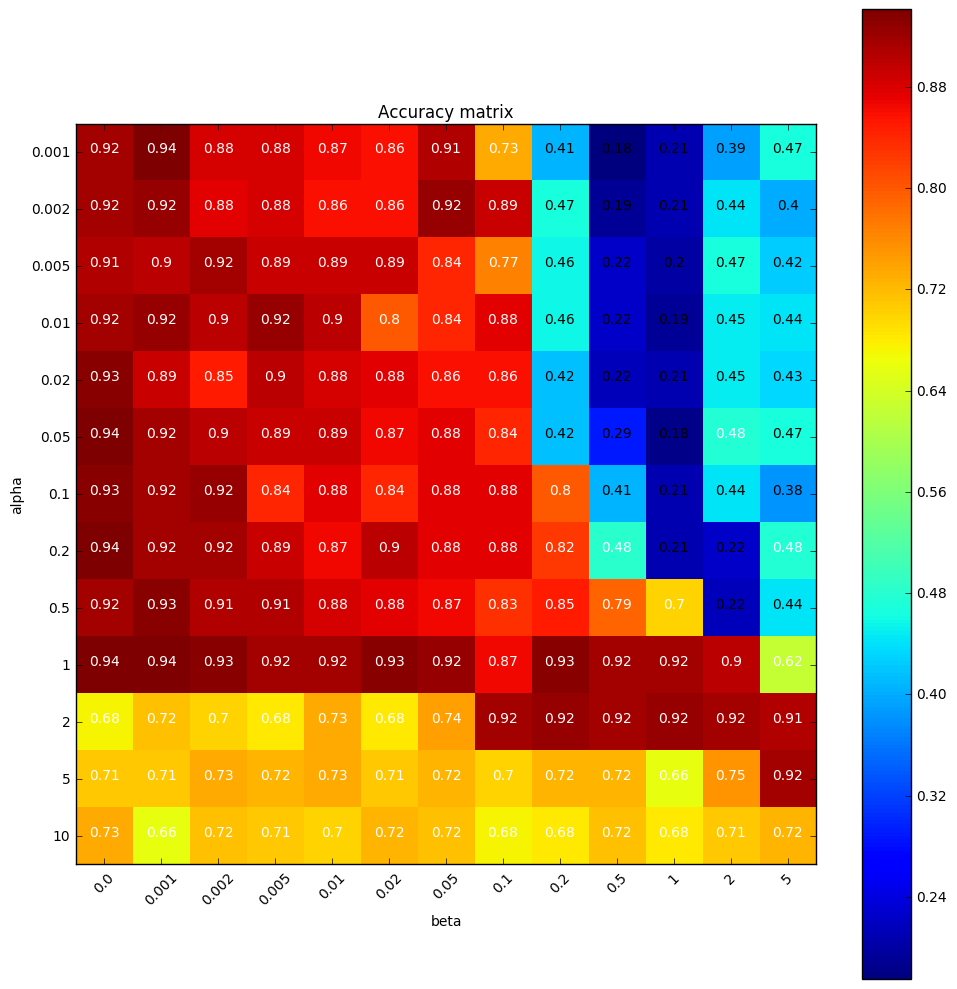

In [19]:
import itertools
def plot_matrix(mat, alpha_pg, beta_pg, title='Accuracy matrix',
                          cmap=plt.cm.jet):
    plt.imshow(mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(alpha_pg))
    plt.xticks(tick_marks, beta_pg, rotation=45)
    plt.yticks(tick_marks, alpha_pg)

    thresh = mat.max() / 2.
    for i, j in itertools.product(range(mat.shape[0]), range(mat.shape[1])):
        plt.text(j, i, np.around(mat[i, j], decimals=2),
                 horizontalalignment="center",
                 color="white" if mat[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('alpha')
    plt.xlabel('beta')

mat = np.zeros((len(alpha_pg), len(beta_pg)))
k = 0
for i in range(len(alpha_pg)):
    for j in range(len(beta_pg)):
        mat[i, j] = errors[k]['score']
        k += 1
plt.figure(figsize=(10, 10))
plot_matrix(mat, alpha_pg, beta_pg)

## Пункт 5. Исследование влияния размера подвыборки на скорость сходимости и точность решения метода стохастического субградиентного спуска

In [45]:
my_svm = svm.SVM(C=1.0, method='stoch_subgradient')
errors = []
for i in range(30, 301, 10):
    error = []
    X_tmp = np.vstack((X_fst[:i], X_sec[:i]))
    y_tmp = np.hstack((np.ones(i), np.zeros(i)-1))
    for train_inds, test_inds in kfold_obj.split(X_tmp):
        my_svm.fit(X_tmp[train_inds], y_tmp[train_inds], \
                   tol=1e-4, max_iter = 1000, verbose=False, \
                   stop_criterion="objective", alpha=0.001, beta=0.001)
        y_pred = my_svm.predict(X_train[test_inds], return_classes=True)
        error.append(get_accuracy(y_pred, y_train[test_inds]))
    errors.append(min(error))
    print(errors[-1])
clear_output()

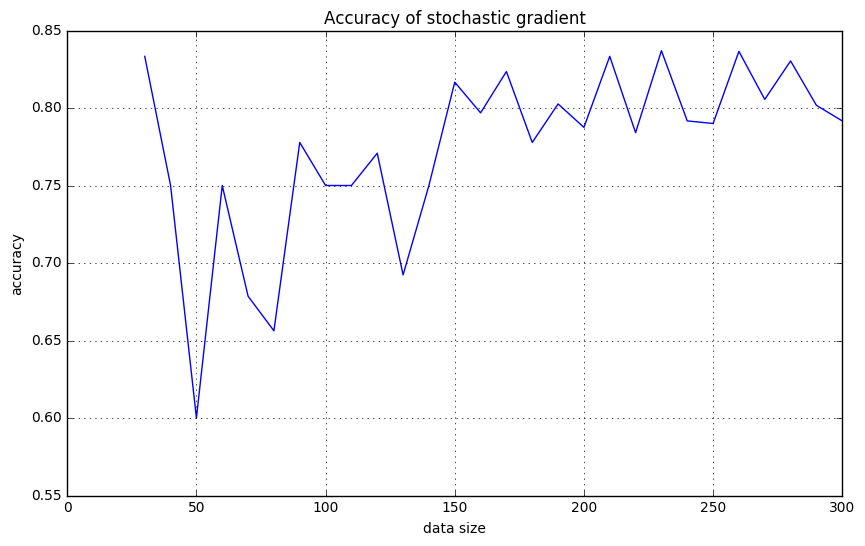

In [46]:
plt.figure(figsize=(10, 6))
s_axis = np.arange(30, 301, 10)
plt.plot(s_axis, errors)

plt.xlabel('data size')
plt.ylabel('accuracy')
plt.title('Accuracy of stochastic gradient')
plt.grid(True)

## Пункт 6. Визуализация двумерной выборки для линейного и RBF ядра

[LibSVM]

/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:220: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


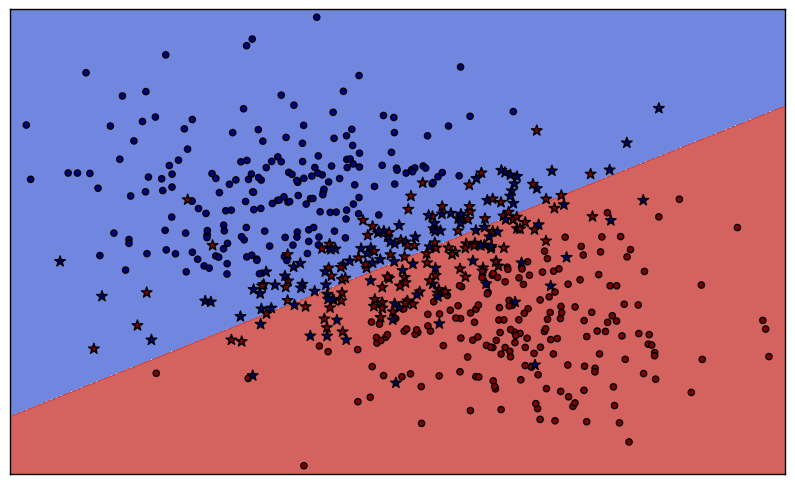

In [34]:
import imp

imp.reload(svm)
my_svm = svm.SVM(C=0.5, method='libsvm', kernel='linear')
my_svm.fit(X_train[:, :2], y_train)
plt.figure(figsize=(10, 6))
svm.visualize(X_train[:, :2], y_train, my_svm, True)

[LibSVM]

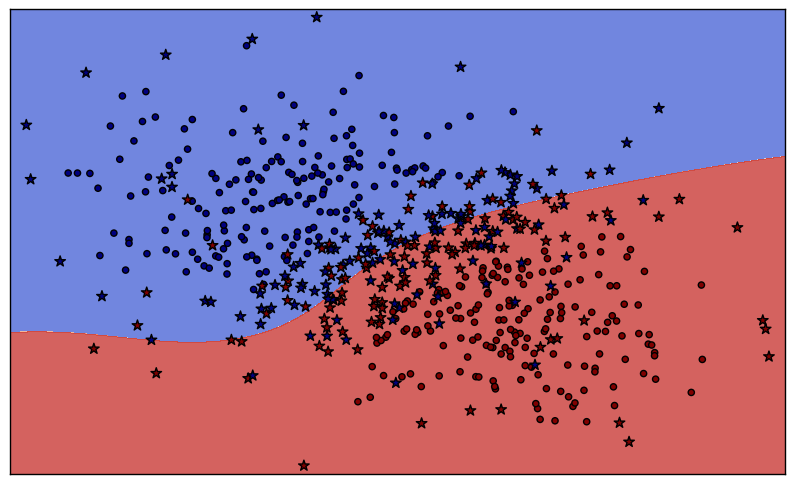

In [35]:
my_svm = svm.SVM(C=0.5, method='libsvm', kernel='rbf', gamma=0.01)
my_svm.fit(X_train[:, :2], y_train)
plt.figure(figsize=(10, 6))
svm.visualize(X_train[:, :2], y_train, my_svm, True)